In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [21]:
profs_tensem = []
for t in ([38.6,38.7]):
    ds = pd.read_csv('test/prof_%g' %t, sep='\t', names=['z','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], header=1)
    profs_tensem.append(ds)

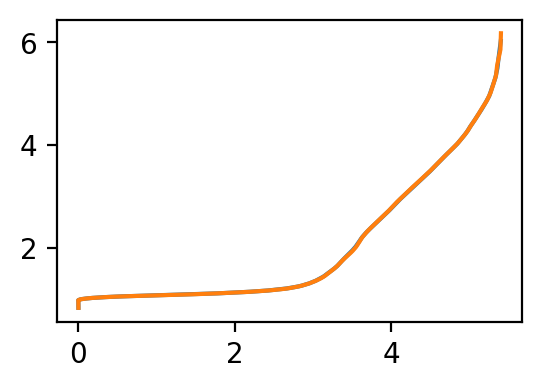

In [27]:
fig = plt.figure(figsize=[3,2], dpi=200)
for prof in profs_tensem:
    plt.plot(prof.ux, prof.z)

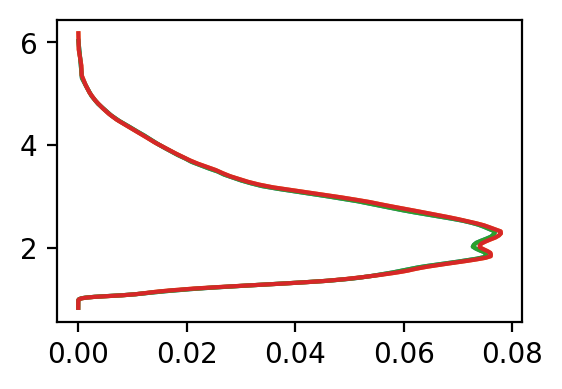

In [32]:
fig = plt.figure(figsize=[3,2], dpi=200)
for prof in profs_tensem:
    plt.plot(prof.uyuy, prof.z)
for prof in profs_tensem:
    plt.plot(prof.uyuy-prof.uy**2, prof.z)

In [33]:
# How do I remove the mean

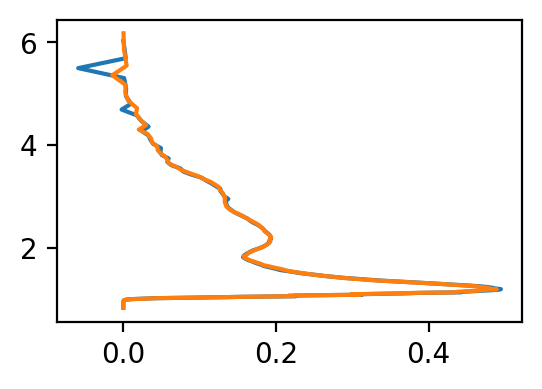

In [35]:
fig = plt.figure(figsize=[3,2], dpi=200)
# for prof in profs_tensem:
#     plt.plot(prof.uxux, prof.z)
for prof in profs_tensem:
    plt.plot(prof.uxux-prof.ux**2, prof.z)

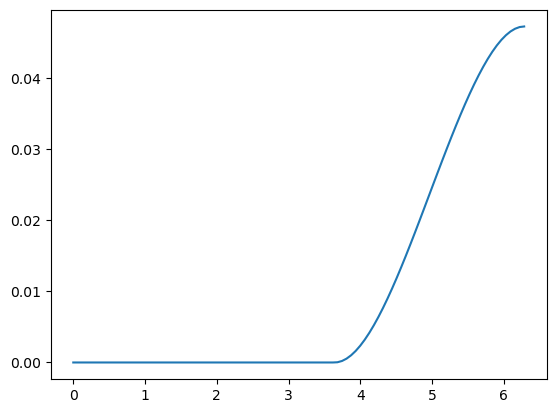

In [29]:
# plt.plot(profs_tensem[0].z, profs_tensem[0].a)
############ Profile of acceleration ##############

z = np.linspace(0, 2*np.pi, 100)
Ustar = 0.25
L0 = 2*np.pi
h_ = 1

total = Ustar**2*1

def forcing (y):
    return 4*total / (L0-h_)**4 * (L0-h_ - 2*(y-h_))**2 * (5*(L0-h_) - 4*(y-h_))
def a(y):
    half = (L0-h_)/2.+1
    return [1 if elem > half else 0 for elem in y]
    
plt.plot(z, forcing(z)*a(z))

In [10]:
from windwave.fio import read_fields_2D

In [21]:
path = '/home/ctrsp-2024/jiarongw/outputs/test_NWP_ZPG/'
times=[38.51]
ds = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f','ax','ay','pair'])


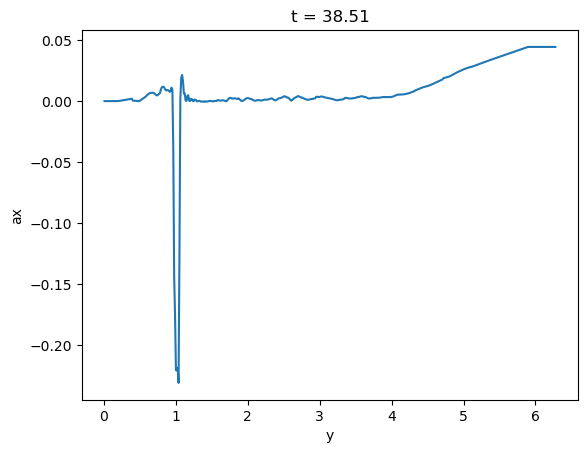

In [24]:
ds.ax.isel(t=0).mean(dim='x').plot()
ds.ax

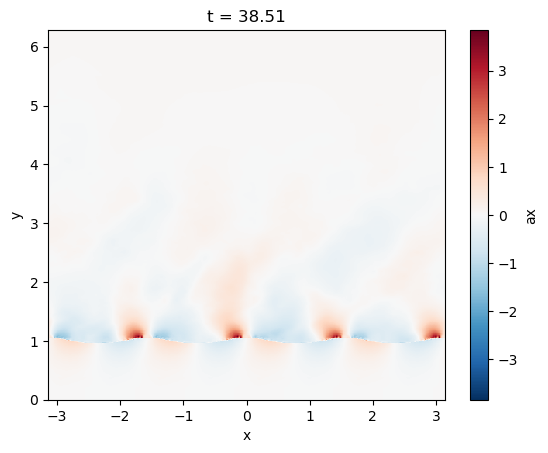

In [31]:
ds.ax.isel(t=0).plot(x='x')